## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

*Supervised learning with a focus on regression (Linear Regression, Random Forest)*

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

*Physicochemical properties and quality score as features and target*

### Data Collection

**Q3. From where do we get our data?**

*The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].*

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

*TODO*

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

*Correlation between physicochemical features and quality score and Metrics like MAE, RMSE, and R² to evaluate model performance*


<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

Red Wine Data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2    

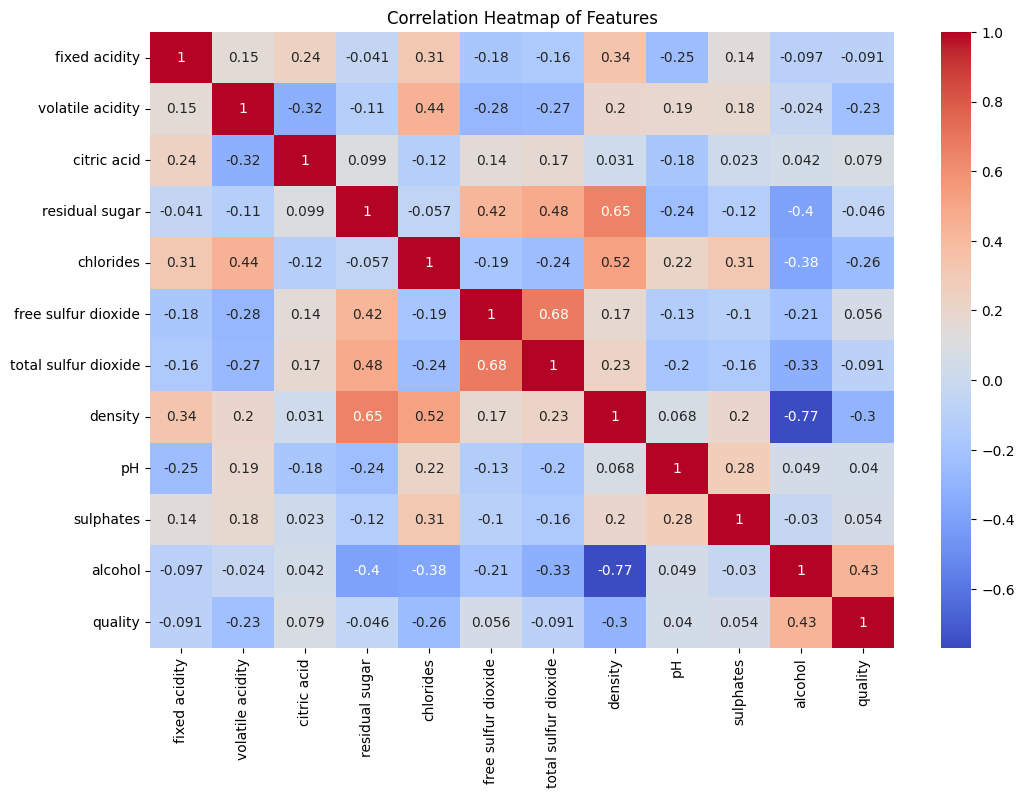

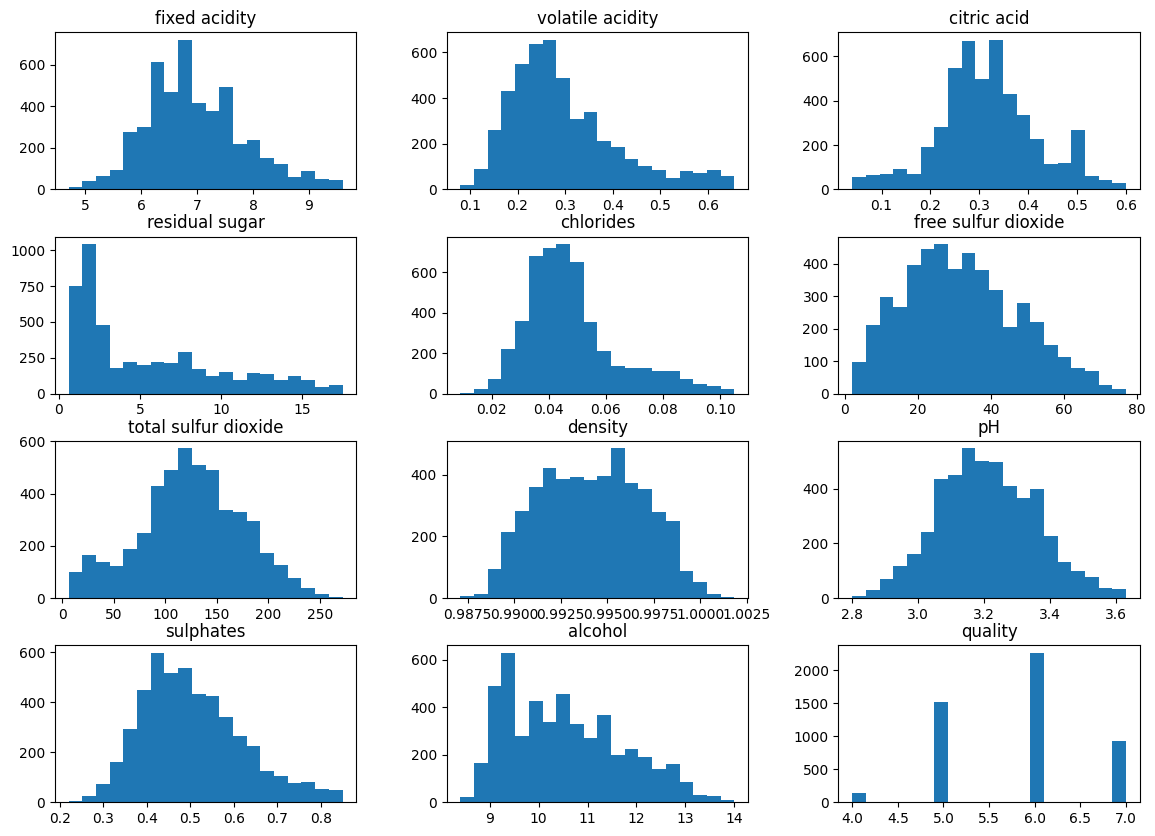

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read the datasets
red_wine_path = r"D:\Downloads\New folder\OneDrive_1_10-1-2024\wine+quality\winequality-red.csv"
white_wine_path = r"D:\Downloads\New folder\OneDrive_1_10-1-2024\wine+quality\winequality-white.csv"

red_wine_data = pd.read_csv(red_wine_path, sep=';')
white_wine_data = pd.read_csv(white_wine_path, sep=';')

# Combine the datasets for analysis
wine_data = pd.concat([red_wine_data, white_wine_data], keys=['red', 'white']).reset_index(drop=True)

# Display the first few rows of the datasets
print("Red Wine Data:")
print(red_wine_data.head())
print("\nWhite Wine Data:")
print(white_wine_data.head())

# Check for missing values
missing_values = wine_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Handle missing values by filling with mean
wine_data.fillna(wine_data.mean(), inplace=True)

# Verify no missing values remain
print("\nMissing values after handling:")
print(wine_data.isnull().sum())

# Check for outliers using the IQR method
Q1 = wine_data.quantile(0.25)
Q3 = wine_data.quantile(0.75)
IQR = Q3 - Q1

# Remove rows that have outliers
wine_data_cleaned = wine_data[~((wine_data < (Q1 - 1.5 * IQR)) | (wine_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Implement Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(wine_data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

# Check the distribution of data using histograms
wine_data_cleaned.hist(bins=20, figsize=(14, 10), grid=False)
plt.show()


### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

In [12]:
# Prepare data for modeling
X = wine_data_cleaned.drop(columns=['quality'])  # Features
y = wine_data_cleaned['quality']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

linear_reg = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)

# Train models
linear_reg.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test_scaled)
y_pred_rf = random_forest.predict(X_test_scaled)


### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

*TODO*
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

Linear Regression:
MAE: 0.5470, RMSE: 0.6779, R²: 0.2669

Random Forest:
MAE: 0.4218, RMSE: 0.5702, R²: 0.4812


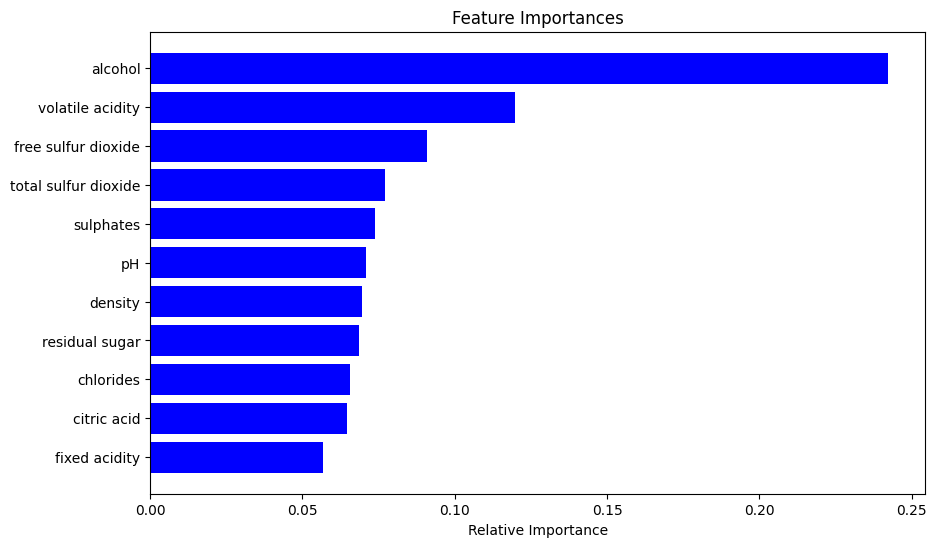

In [10]:
# Import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression Metrics
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

# Random Forest Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("Linear Regression:")
print(f"MAE: {mae_linear:.4f}, RMSE: {rmse_linear:.4f}, R²: {r2_linear:.4f}")

print("\nRandom Forest:")
print(f"MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")

# Feature Importance
importances = random_forest.feature_importances_
features = X.columns

# Sort by importance
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### Conclusion

*TODO*

In [11]:
# Conclusion
print("\n### Conclusion ###")
print("- We implemented two regression algorithms (Linear Regression and Random Forest) to predict wine quality based on physicochemical properties.")
print("- Random Forest outperformed Linear Regression in terms of lower MAE and RMSE, and higher R² score.")
print("- The most important features influencing wine quality were alcohol content, volatile acidity, and sulphates.")
print("- One limitation is that we did not consider interactions between features. Future work could involve hyperparameter tuning or exploring more complex models.")



### Conclusion ###
- We implemented two regression algorithms (Linear Regression and Random Forest) to predict wine quality based on physicochemical properties.
- Random Forest outperformed Linear Regression in terms of lower MAE and RMSE, and higher R² score.
- The most important features influencing wine quality were alcohol content, volatile acidity, and sulphates.
- One limitation is that we did not consider interactions between features. Future work could involve hyperparameter tuning or exploring more complex models.
